# Annotate shodan.io webcam images

This project pulls random internet exposed webcam images from shodan and labels them with Google Vision AI.

## Requirements

- Shodan python library
- Google cloud Vision python API library
- Pillow for image manipulation

The last two are available in the default python3 notebook in GCP, so just install shodan

In [1]:
!pip install shodan

In [2]:
from shodan import Shodan
import shodan.helpers as helpers
import getpass

import os
import sys
import io

import base64
from google.cloud import vision
from PIL import Image, ImageDraw, ImageFont

# Enter your shodan API key when prompted

In [4]:
api_key=getpass.getpass()

 ································


In [10]:
class img:
    """
    A class with info about an image
    """
    def __init__(self,name='',filename='',labels=None,objects=None):
        self.name=name
        self.filename=filename
        self.labels=labels
        self.objects=objects
        
    def print(self):
        l=[i.description + ' (%.2f%%)' % (i.score*100.) for i in self.labels]
        o=[ i.name + ' (%.2f%%)' % (i.score*100.) for i in self.objects ]
        print('{} ({})\n\tLabels: {}\n\tObjects: {}'.format( self.name,self.filename,','.join(l),','.join(o) ) )
        
    def obj_annotate_and_write(self):
        try:
            img = Image.open(self.filename) #convert the image to PIL
        except:
            return
        width, height  = img.size
        for object_ in self.objects: 
            vects = object_.bounding_poly.normalized_vertices
            # denormalize the vertices
            x0, y0 = vects[0].x * width, vects[0].y * height # Bottom Left vertex
            x1, y1 = vects[1].x * width, vects[1].y * height # Bottom Right vertex
            x2, y2 = vects[2].x * width, vects[2].y * height # Top Right vertex
            x3, y3 = vects[3].x * width, vects[3].y * height # Top Left vertex

            draw = ImageDraw.Draw(img)
            draw.line([
            x0, y0,
            x1, y1,
            x2, y2,
            x3, y3,
            x0, y0], width=4 ,fill=None)

            font = ImageFont.truetype('/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', 16)
            draw.text((x0 + 10, y0),
                      font=font,text=object_.name, fill='white')
        filename_noext='.'.join(self.filename.split('.')[0:-1])
        ext=self.filename.split('.')[-1]
        self.annotated_image=img
        img.save(filename_noext + '_annotated.'+ext)

189.173.165.3 (images/189.173.165.3.jpg)
	Labels: Flash photography (87.00%),Black-and-white (82.34%),Font (81.34%),Automotive lighting (81.31%),Space (73.41%),Monochrome photography (72.18%),Drinkware (71.35%),Monochrome (70.24%),Darkness (70.13%),Building (66.16%)
	Objects: Wheel (63.71%)


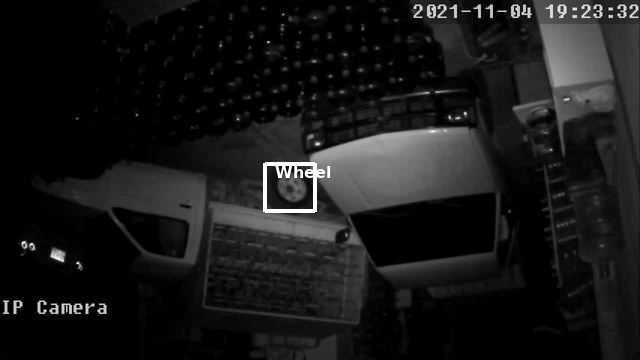

126.213.133.106 (images/126.213.133.106.jpg)
	Labels: Vertebrate (91.86%),Window (87.98%),Working animal (80.42%),Dog breed (79.94%),Snout (76.38%),Dairy cow (76.00%),Livestock (74.02%),Landscape (72.12%),Bovine (65.38%),Terrestrial animal (64.71%)
	Objects: Cattle (89.95%),Cattle (82.44%),Window (80.72%)


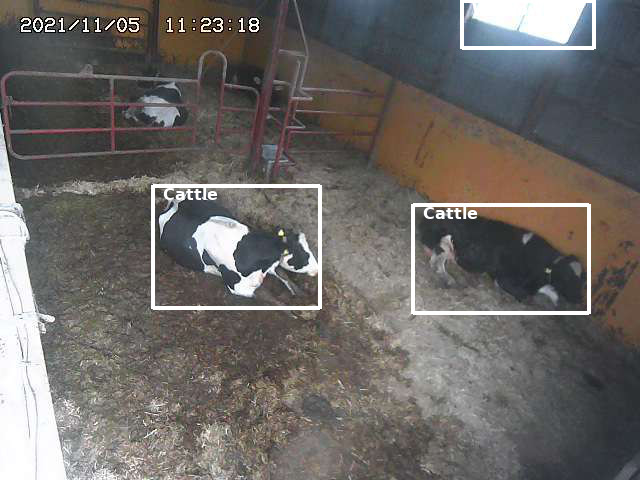

78.110.157.166 (images/78.110.157.166.jpg)
	Labels: Atmosphere (94.82%),Automotive lighting (91.59%),Light (91.09%),Road surface (86.86%),Black-and-white (84.81%),Style (83.93%),Asphalt (83.23%),Atmospheric phenomenon (81.94%),Flash photography (81.94%),Midnight (78.01%)
	Objects: 
177.27.203.193 (images/177.27.203.193.jpg)
	Labels: Property (94.41%),Architecture (85.57%),Interior design (85.28%),Flooring (85.12%),Building (84.87%),Floor (84.55%),Chair (82.87%),Door (82.38%),Wood (82.16%),Wall (81.34%)
	Objects: Chair (96.36%),Table top (84.39%)


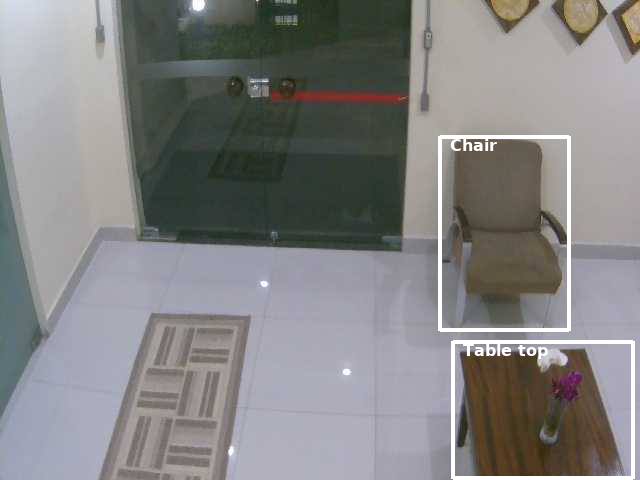

114.34.225.136 (images/114.34.225.136.jpg)
	Labels: Plant (94.54%),Grass (80.67%),Terrestrial plant (80.25%),Groundcover (77.51%),Tree (76.92%),Grass family (75.33%),Landscape (72.11%),Slope (69.26%),Urban design (69.13%),Plantation (65.45%)
	Objects: Plant (77.92%)


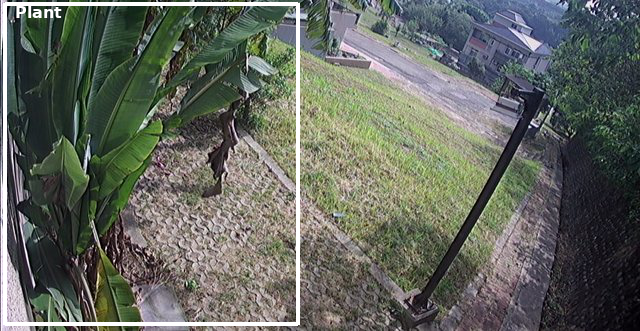

69.178.36.233 (images/69.178.36.233.jpg)
	Labels: Wood (87.40%),Black-and-white (84.07%),Grey (84.04%),Style (83.85%),Rectangle (83.51%),Door (82.40%),Cradle (80.26%),Tints and shades (77.16%),Hardwood (75.38%),Monochrome photography (74.06%)
	Objects: Door (74.20%),Furniture (67.97%)


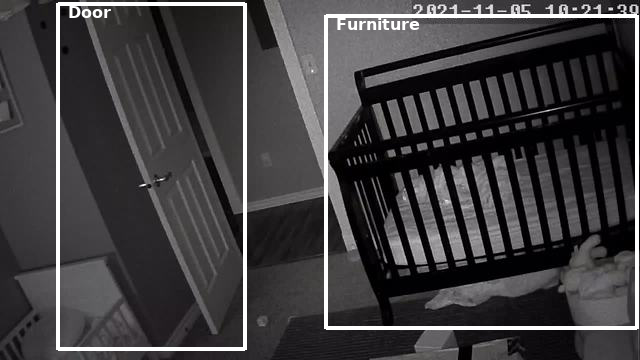

177.179.13.92 (images/177.179.13.92.jpg)
	Labels: Couch (95.63%),Furniture (93.06%),Table (90.95%),Purple (89.96%),Black (89.54%),Window (88.92%),Comfort (88.40%),Textile (88.02%),Plant (87.86%),studio couch (87.03%)
	Objects: Window (87.46%),Couch (81.94%),Plant (77.91%),Chair (65.40%),Furniture (58.45%)


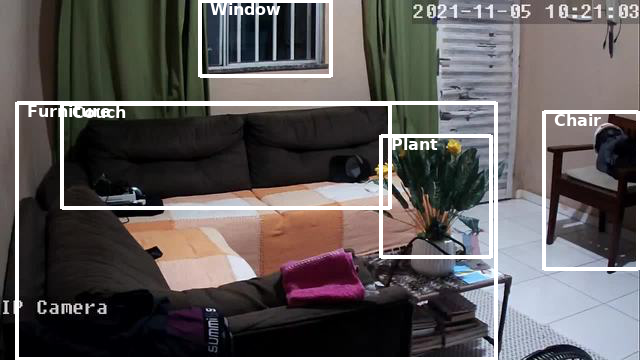

69.59.101.150 (images/69.59.101.150.jpg)
	Labels: Building (86.72%),Black-and-white (85.31%),Style (84.04%),Tower block (77.26%),Monochrome (75.39%),Facade (75.15%),Monochrome photography (75.01%),City (75.01%),Glass (72.81%),Mesh (72.61%)
	Objects: 
82.127.1.90 (images/82.127.1.90.jpg)
	Labels: Black-and-white (84.76%),Grey (84.46%),Font (84.30%),Style (83.91%),Art (81.96%),Wall (81.90%),Monochrome photography (73.39%),Monochrome (73.02%),Room (67.81%),Poster (65.89%)
	Objects: Poster (82.56%),Person (82.44%),Poster (75.91%),Poster (68.09%),Poster (67.22%),Poster (59.68%),Poster (57.99%)


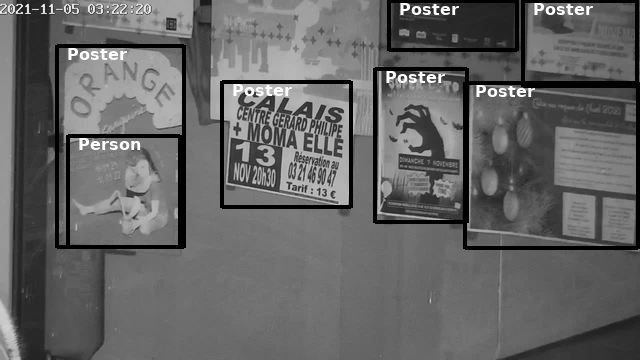

218.156.110.19 (images/218.156.110.19.jpg)
	Labels: Wood (87.29%),Building (86.93%),Floor (82.86%),Desk (81.60%),Flooring (81.38%),Table (81.20%),Engineering (76.00%),Hardwood (75.42%),Space (73.10%),Urban design (72.25%)
	Objects: Computer monitor (61.70%)


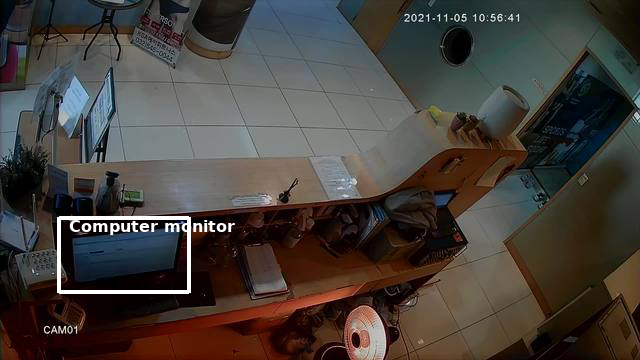

In [11]:
client = vision.ImageAnnotatorClient()
api=Shodan(api_key)
output_dir='images'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

images=[]
search_limit=10
search_counter=0
for banner in api.search_cursor('has_screenshot:1 screenshot.label:webcam'):
    # Try to grab the screenshot from the banner
    screenshot = helpers.get_screenshot(banner)

    # If we found a screenshot then create a file w/ the data
    if screenshot:
        # Create the file handle
        image_file = open('{}/{}.jpg'.format(output_dir, banner['ip_str']), 'wb')
        # Write the image data which is stored using base64 encoding
        #image.write(screenshot['data']) #.decode('base64'))
        image_file.write( base64.b64decode(screenshot['data']) )
        
        image = vision.Image(content=base64.b64decode(screenshot['data']) )
        response = client.label_detection(image=image)
        labels = response.label_annotations
        objects = client.object_localization(image=image).localized_object_annotations

        ii=img(name=banner['ip_str'], filename='{}/{}.jpg'.format(output_dir, banner['ip_str']),
               labels=labels,objects=objects)
        images.append(ii)
        ii.print()
        if len(objects)>0:
            ii.obj_annotate_and_write()
            ii.annotated_image.show()
        
        search_counter += 1
        if search_counter>=search_limit:
            break
            